Here is code used to explore the use of https://github.com/cooperlab/AdaptiveKDE

In [1]:
from GJEphys.ssvkernel import ssvkernel
import pandas as pd
import matplotlib.pyplot as plt
from GJEphys.matplotlibRCParams import mplPars
import seaborn as sns
import os
from GJEphys.pdColumnNameMapCont import mdFN
import numpy as np
import warnings
warnings.filterwarnings(action='once')

In [2]:
dataFile = os.path.expanduser("~/DataAndResults/ephys/Results/ContStimPSTH/data_15Nrns.xlsx")

In [3]:
expID = "130313-4Rh"
trialName = "Trial17"

In [4]:
dataDF = pd.read_excel(dataFile)

In [5]:
trialCrit = np.logical_and(dataDF[mdFN["expID"]] == expID, dataDF[mdFN["trialName"]] == trialName)
trialData = dataDF.loc[trialCrit, :]

expCrit = dataDF[mdFN["expID"]] == expID
expData = dataDF.loc[expCrit, :]

# print(trialSpikeTimes)

In [6]:
binWidth = 0.001
tEdges = np.arange(-1, 2, binWidth)
tEst = tEdges[1:] - 0.5 * binWidth

# tEst

In [ ]:
spikeData = expData
spikeTimes = spikeData["Spike Time (s)"]


nTrials = spikeData[mdFN["trialName"]].unique().size
nSpikes = spikeData.shape[0]

trialExp = spikeData.loc[(mdFN["expID"], mdFN["trialName"]), :].apply(lambda x: "{}{}".format(x[mdFN["expID"]],
                                                                                               x[mdFN["laborState"]]),
                                                                       axis=0)

In [13]:
res = ssvkernel(x=spikeTimes.values, tin=tEst, WinFunc="Gauss")

#res

In [10]:
fr = res[0] * nSpikes / nTrials
optW = res[2]
confInt95 = res[5][0]

Text(0.5,0,'time (s)')

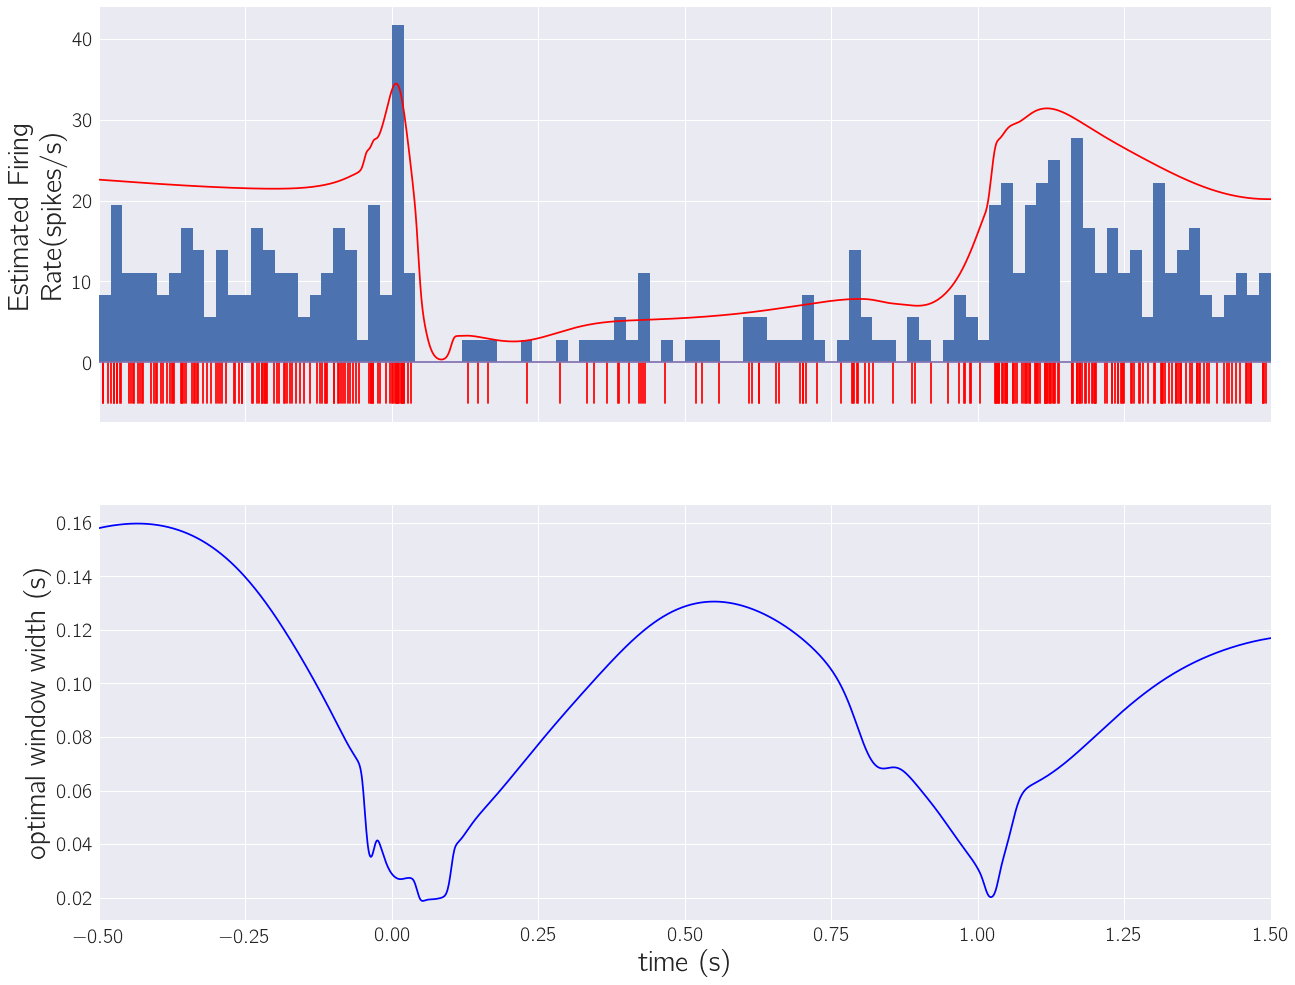

In [ ]:
sns.set(rc=mplPars, style="darkgrid")
fig, (ax1, ax2) = plt.subplots(figsize=(21, 16.8), nrows=2, sharex=True)
histBinWidth = 0.02
histBins = np.arange(-1, 2, histBinWidth)
ax1.hist(spikeTimes.values, histBins, histtype="stepfilled",
         weights=np.ones_like(spikeTimes.values) / histBinWidth / nTrials)
ax1.stem(spikeTimes.values, -5*np.ones_like(spikeTimes.values), "-r", markerfmt='None')
ax1.fill_between(tEst, fr - 0.5 * confInt95, fr + 0.5 * confInt95, facecolors='r', interpolate=True,
                 alpha=0.5)
ax1.plot(tEst, fr, 'r-')
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylabel("Estimated Firing\nRate(spikes/s)")

ax2.plot(tEst, optW, 'b-')
ax2.set_ylabel("optimal window width (s)")
ax2.set_xlabel("time (s)")
